# Taller Práctico: Árboles de Decisión con Scikit-Learn

**Objetivos de la Práctica:**

En este taller, aplicaremos los conceptos teóricos de los árboles de decisión. Al finalizar, serás capaz de:

1.  **Cargar y preparar datos** para un problema de clasificación.
2.  **Entrenar un árbol de decisión** utilizando la librería `scikit-learn`.
3.  **Visualizar e interpretar** la estructura de un árbol.
4.  Identificar y comprender el problema del **sobreajuste** en los árboles.
5.  Aplicar la **poda por complejidad de costo** para encontrar un árbol más robusto.
6.  Evaluar la **importancia de las características** que el modelo aprende.

## 1. Preparación del Entorno

Primero, importaremos las librerías que necesitaremos para nuestro análisis. Usaremos `pandas` para la manipulación de datos, `scikit-learn` para el modelado, `plotly` para visualizaciones interactivas y `matplotlib` para la visualización específica del árbol.

In [35]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para modelado y evaluación
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Librerías para visualización
import plotly.express as px
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## 2. Carga y Exploración de Datos

Vamos a utilizar el dataset de **Cáncer de Mama de Wisconsin**, que está convenientemente incluido en `scikit-learn`. Es un problema de clasificación binaria clásico donde el objetivo es predecir si un tumor es maligno o benigno basándose en varias características de sus células.

In [36]:
# Cargamos el dataset. `as_frame=True` nos lo devuelve como un DataFrame de pandas.
data = load_breast_cancer(as_frame=True)
df = data.frame

# Separamos las características (X) y la variable objetivo (y)
X = df[data.feature_names]
y = df['target']

# Nombres de las clases (0: Maligno, 1: Benigno)
print(f"Nombres de las clases: {data.target_names}")

# Echamos un vistazo a las primeras filas del dataset
print("\nPrimeras 5 filas de características:")
display(X.head())

# Resumen del dataset
print("\nInformación del DataFrame:")
X.info()

Nombres de las clases: ['malignant' 'benign']

Primeras 5 filas de características:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14

<Axes: title={'center': 'Distribución de Clases'}, xlabel='target'>

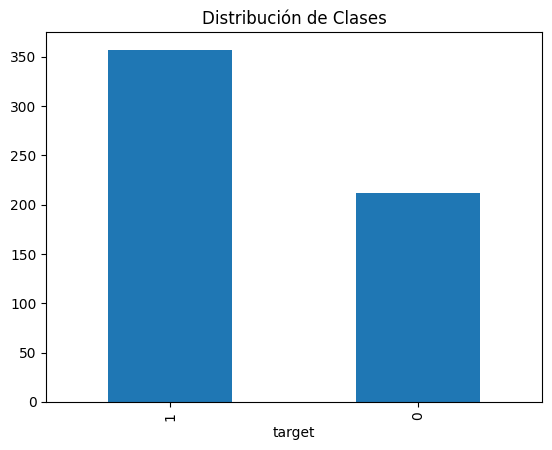

In [37]:
y.value_counts().plot(kind='bar', title='Distribución de Clases')

### Visualización Exploratoria
Usemos Plotly para visualizar la relación entre dos características importantes, `mean radius` y `mean texture`, y ver cómo se distribuyen las clases.

In [38]:
df_to_plot = df.copy()
df_to_plot['target'] = df_to_plot['target'].map({i: name for i, name in enumerate(data.target_names)})
fig = px.scatter(
    df_to_plot,
    x='mean radius', 
    y='mean texture', 
    color='target', 
    #color_continuous_scale='reds_r',
    title='Distribución de Clases por Radio y Textura Promedio',
    labels={'target': 'Clase', 'mean radius': 'Radio Promedio', 'mean texture': 'Textura Promedia'}
)
fig.show()

## 3. Entrenamiento de un Árbol de Decisión (Sin Poda)

Ahora, dividiremos nuestros datos en un conjunto de entrenamiento y uno de prueba. Luego, entrenaremos un árbol de decisión sin ninguna restricción de crecimiento para observar el fenómeno del sobreajuste.

In [39]:
# Dividimos los datos: 80% para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el clasificador sin restricciones de profundidad
tree_overfit = DecisionTreeClassifier(random_state=42)

# Entrenamos el modelo
tree_overfit.fit(X_train, y_train)

# Evaluamos el rendimiento
y_train_pred = tree_overfit.predict(X_train)
y_test_pred = tree_overfit.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precisión en el set de ENTRENAMIENTO: {train_accuracy:.4f}")
print(f"Precisión en el set de PRUEBA: {test_accuracy:.4f}")

Precisión en el set de ENTRENAMIENTO: 1.0000
Precisión en el set de PRUEBA: 0.9474


**Observación:** ¡El modelo tiene una precisión del 100% en los datos de entrenamiento! Esto es una señal clara de sobreajuste. El árbol ha crecido tanto que ha "memorizado" cada punto de entrenamiento, pero su rendimiento en los datos de prueba, aunque bueno, es menor.

### Visualización del Árbol Sobreajustado
Veamos qué tan complejo es este árbol. La función `plot_tree` nos ayuda a visualizarlo. Usamos `matplotlib` para esta tarea, ya que `plot_tree` está construida sobre ella.

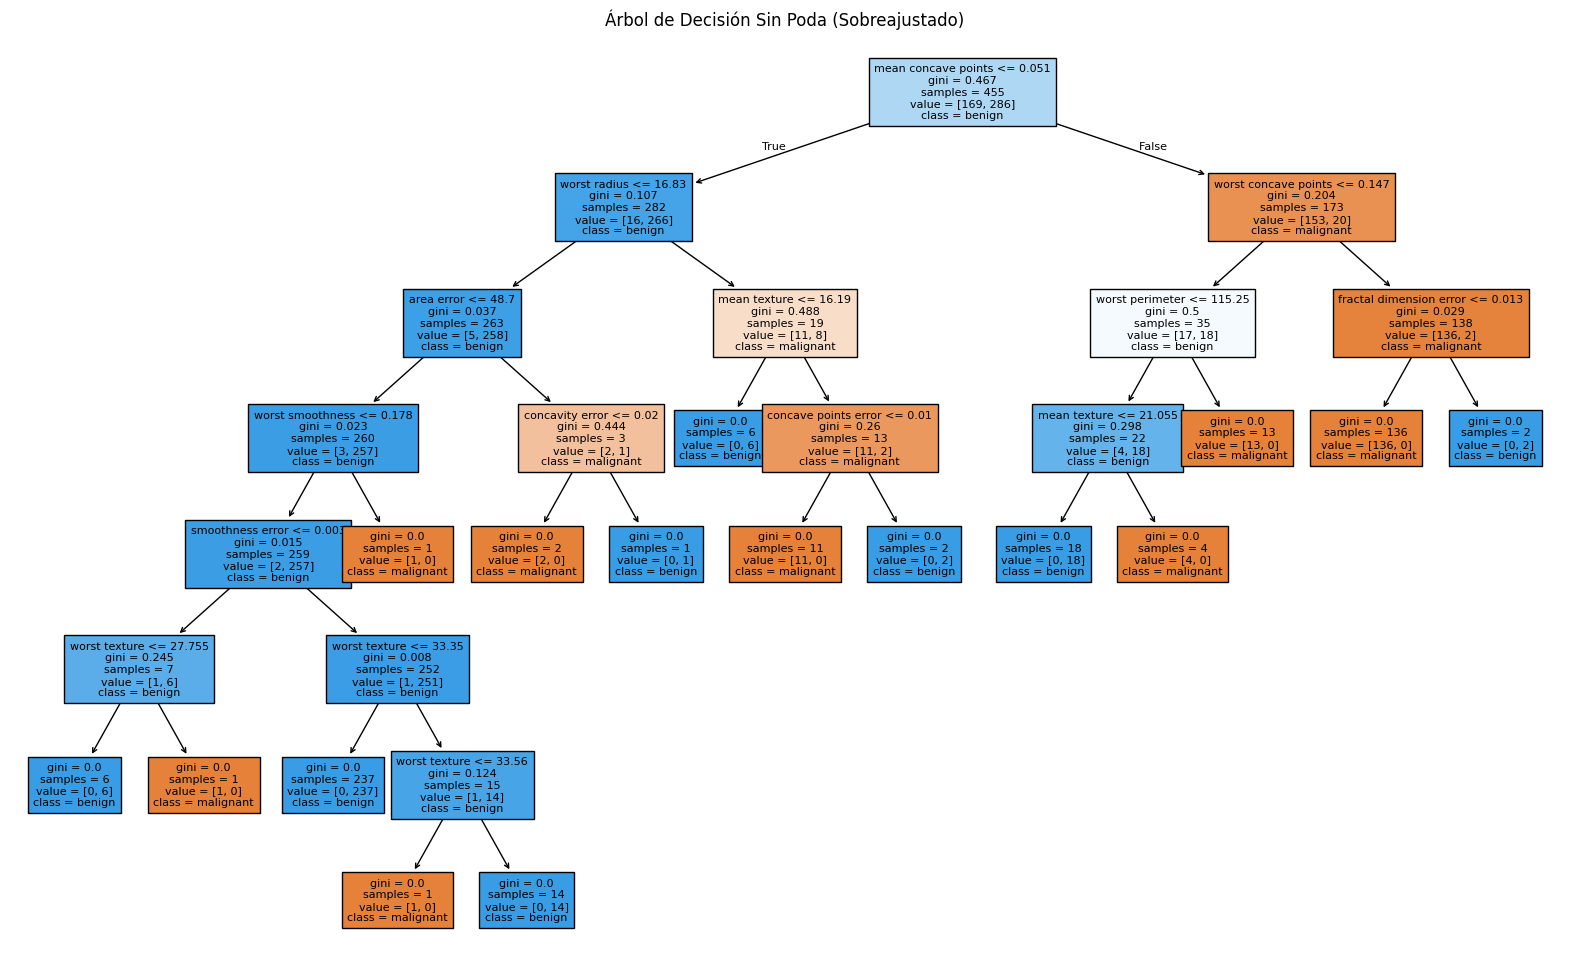

In [40]:
plt.figure(figsize=(20, 12))
plot_tree(tree_overfit, 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          filled=True,
          fontsize=8)
plt.title("Árbol de Decisión Sin Poda (Sobreajustado)")
plt.show()

Como podemos ver, el árbol es enorme e ininterpretable. Necesitamos una forma de simplificarlo: la poda.

## 4. Poda por Complejidad de Costo (Cost-Complexity Pruning)

La poda por complejidad de costo es una estrategia para encontrar el sub-árbol que mejor generaliza. Funciona penalizando el tamaño del árbol. El parámetro clave es `ccp_alpha` (el $\alpha$ que vimos en la teoría).

El proceso es:
1.  Calcular la ruta de poda: obtener los valores de `ccp_alpha` que generan diferentes sub-árboles.
2.  Usar validación cruzada para encontrar el mejor valor de `ccp_alpha`.

In [41]:
# 1. Calcular la ruta de poda
path = tree_overfit.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Excluimos el alpha máximo que eliminaría todo el árbol
ccp_alphas = ccp_alphas[:-1]

# 2. Encontrar el mejor alpha con Validación Cruzada
param_grid = {'ccp_alpha': ccp_alphas}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['ccp_alpha']
print(f"Mejor valor de ccp_alpha encontrado: {best_alpha:.6f}")

Mejor valor de ccp_alpha encontrado: 0.008664


## 5. Entrenamiento y Evaluación del Árbol Óptimo

Ahora que tenemos el mejor valor de `ccp_alpha`, entrenamos un nuevo árbol con ese parámetro y evaluamos su rendimiento.

In [42]:
# El GridSearchCV con refit=True (por defecto) ya ha re-entrenado el mejor modelo
tree_pruned = grid_search.best_estimator_

# Evaluamos el nuevo modelo podado
y_train_pred_p = tree_pruned.predict(X_train)
y_test_pred_p = tree_pruned.predict(X_test)

train_accuracy_p = accuracy_score(y_train, y_train_pred_p)
test_accuracy_p = accuracy_score(y_test, y_test_pred_p)

print("--- Árbol Sobreajustado ---")
print(f"Precisión en Entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en Prueba: {test_accuracy:.4f}")
print("\n--- Árbol Podado ---")
print(f"Precisión en Entrenamiento: {train_accuracy_p:.4f}")
print(f"Precisión en Prueba: {test_accuracy_p:.4f}")

--- Árbol Sobreajustado ---
Precisión en Entrenamiento: 1.0000
Precisión en Prueba: 0.9474

--- Árbol Podado ---
Precisión en Entrenamiento: 0.9802
Precisión en Prueba: 0.9561


**Análisis de Resultados:** El árbol podado tiene una precisión de entrenamiento más baja (ya no es 100%), lo cual es bueno, significa que no está memorizando. Sin embargo, su precisión en el conjunto de prueba es mayor. ¡Hemos creado un modelo más simple y que generaliza mejor!

### Visualización del Árbol Podado
Veamos ahora nuestro nuevo árbol, mucho más simple e interpretable.

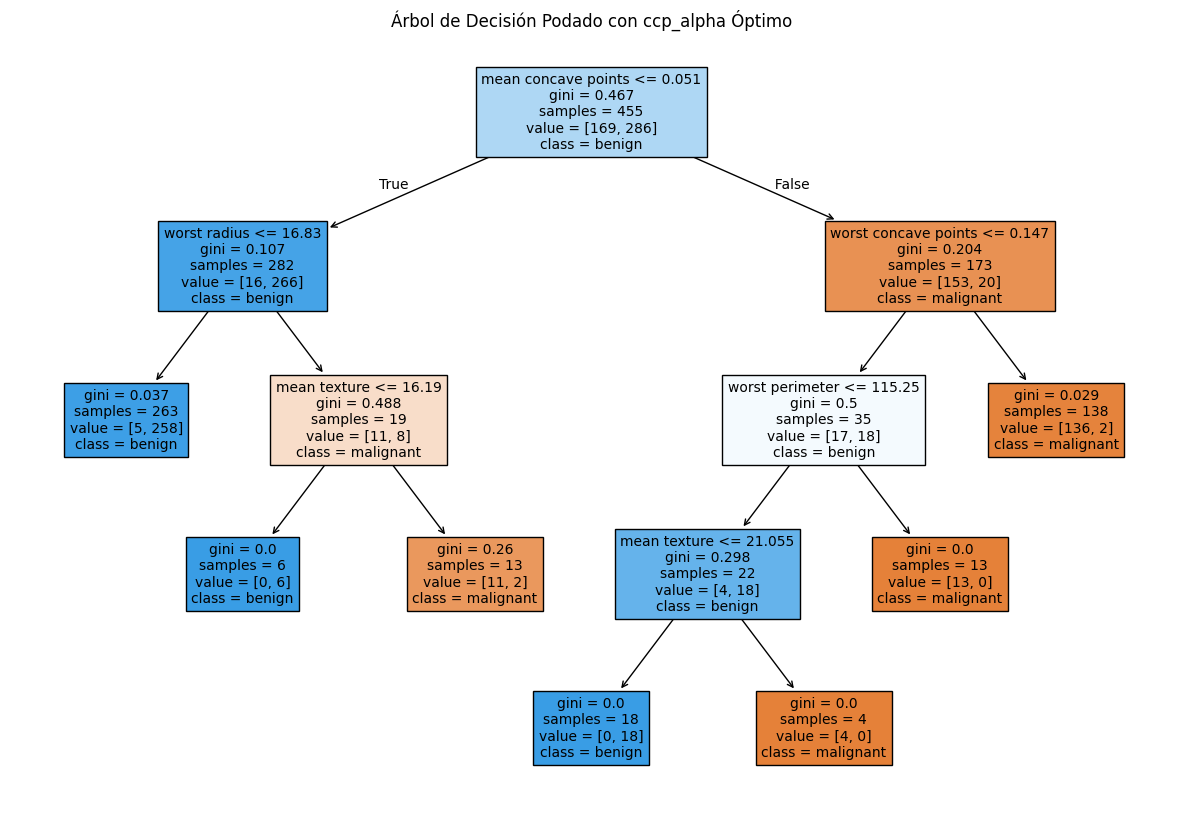

In [43]:
plt.figure(figsize=(15, 10))
plot_tree(tree_pruned, 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          filled=True,
          fontsize=10)
plt.title("Árbol de Decisión Podado con ccp_alpha Óptimo")
plt.show()

## 6. Importancia de las Características

Finalmente, podemos extraer qué características consideró más importantes nuestro árbol podado para tomar sus decisiones. Esto se basa en la reducción total del índice de Gini que cada característica aporta.

La importancia de las características en los árboles de decisión se calcula midiendo cuánto reduce cada característica la impureza (como la impureza de Gini o la entropía) en todos los nodos donde se utiliza para dividir los datos. La importancia de cada característica es la suma de las reducciones de impureza que aporta, ponderada por la cantidad de muestras que divide, y normalizada para que todas las importancias sumen 1.

In [44]:
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_pruned.feature_importances_
}).sort_values('importance', ascending=False)

fig = px.bar(
    importances,
    x='feature',
    y='importance',
    title='Importancia de las Características en el Árbol Podado',
    labels={'feature': 'Característica', 'importance': 'Importancia (Reducción de Gini)'}
)
fig.show()

## 7. Desafíos y Experimentación 🚀

Ahora es tu turno de experimentar. Intenta responder a las siguientes preguntas modificando el código anterior:

1.  **Cambia el Criterio:** En lugar de `'gini'`, entrena un árbol usando `'entropy'` como criterio. ¿Cambia mucho el árbol podado final? ¿Y la importancia de las características?
2.  **Poda por Profundidad:** En lugar de usar `ccp_alpha`, intenta controlar el sobreajuste con el hiperparámetro `max_depth`. Usa `GridSearchCV` para encontrar la profundidad óptima. ¿Qué método da mejores resultados en el set de prueba: poda por complejidad o por profundidad máxima?
3.  **Estabilidad del Modelo:** Cambia el `random_state` en `train_test_split` a otro número (o quítalo). Vuelve a correr todo el notebook. ¿El árbol final y la precisión cambian mucho? Esto te dará una idea de la inestabilidad de los árboles de decisión.

# 📝 Ejercicios Adicionales

Para solidificar tu aprendizaje, te proponemos los siguientes ejercicios para que explores por tu cuenta:

1.  **Otro Dataset de Clasificación:** Repite el análisis completo de este notebook (entrenamiento, poda, visualización) pero con el dataset de **Vinos** de `scikit-learn` (`sklearn.datasets.load_wine`). Es un problema con 3 clases.

2.  **Árboles de Regresión:** Importa el dataset de **Viviendas de California** (`sklearn.datasets.fetch_california_housing`). Entrena un `DecisionTreeRegressor` para predecir el valor de las viviendas. El criterio de división por defecto es el error cuadrático medio (`'squared_error'`). ¿Cómo interpretas el árbol resultante?

3.  **Análisis de Hiperparámetros:** Investiga el efecto de `min_samples_split` y `min_samples_leaf`. Usa `GridSearchCV` para encontrar la mejor combinación de `max_depth`, `min_samples_split` y `min_samples_leaf` para el dataset de cáncer. ¿Mejora el resultado de la poda por complejidad?

4.  **Visualización de Fronteras de Decisión:** Usando solo dos características (ej. `mean radius` y `mean texture`), entrena un árbol simple (ej. `max_depth=3`). Investiga cómo crear un gráfico de contorno (contour plot) para visualizar las "cajas" o fronteras de decisión que el árbol crea en el espacio 2D.

5.  **Sensibilidad a la Escala:** Aunque se dijo que los árboles no son sensibles a la escala, compruébalo. Aplica un `StandardScaler` de `scikit-learn` a los datos `X` antes de entrenar el árbol. ¿Cambia la estructura del árbol o su rendimiento? ¿Por qué sí o por qué no?

6.  **Interpreta una Ruta de Decisión:** En el árbol podado final, elige una hoja y traza la ruta desde el nodo raíz hasta ella. Escribe en texto plano la secuencia de reglas que definen esa hoja. (Ej: "Si `worst radius <= 16.5` Y `worst concave points <= 0.142`...").

7.  **Comparación de Métricas de Impureza:** En el árbol podado con Gini, anota la importancia de las 5 características principales. Ahora, fuerza el entrenamiento y la poda usando `'entropy'` como criterio. Compara la nueva lista de las 5 características más importantes. ¿Son las mismas? ¿En el mismo orden?

8.  **Efecto del Tamaño del Test Set:** Vuelve a ejecutar el análisis, pero esta vez con `test_size=0.4`. ¿Cómo afecta un conjunto de prueba más grande a la evaluación del rendimiento y a la confianza que tienes en tu modelo?

9.  **Explora la Salida de `cost_complexity_pruning_path`:** La variable `path` que creamos contiene `ccp_alphas` e `impurities`. Grafica `impurities` vs `ccp_alphas`. ¿Qué te dice este gráfico sobre cómo la pureza del árbol se ve afectada por el parámetro de poda?

10. **Impacto de una Característica Ruidosa:** Añade una nueva columna a `X_train` y `X_test` con datos completamente aleatorios (ej. `np.random.rand(n_samples, 1)`). Vuelve a entrenar el modelo y a calcular la importancia de características. ¿Aparece la nueva característica "ruidosa" como importante? ¿Qué te dice esto sobre los árboles?

---------------------
#### 1.  **Otro Dataset de Clasificación:** Repite el análisis completo de este notebook (entrenamiento, poda, visualización) pero con el dataset de **Vinos** de `scikit-learn` (`sklearn.datasets.load_wine`). Es un problema con 3 clases.

`Respuesta`:

In [45]:
#
# PREPARACIÓN DEL ENTORNO
#
# >>> Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np
# >>> Librerías para modelado y evaluación
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# >>> Librerías para visualización
import plotly.express as px
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# ======================================================================================================================================
#
# CARGA Y EXPLORACIÓN DE DATOS
#
data_vinos = load_wine(as_frame=True)
df_vinos = data_vinos.frame
# Separamos las características (X) y la variable objetivo (y)
X_vinos = df_vinos[data_vinos.feature_names]
y_vinos = df_vinos['target']
# Nombres de las clases (0: Clase 0, 1: Clase 1, 2: Clase 2)
display(Markdown(f"**Nombres de las clases:** {list(data_vinos.target_names)}"))
# Primeras filas del dataset
display(Markdown("**Primeras 5 filas de características:**")) 
display(X_vinos.head())
# Resumen del dataset de vinos
display(Markdown("**Información del DataFrame de vinos**:"))
X_vinos.info()


**Nombres de las clases:** ['class_0', 'class_1', 'class_2']

**Primeras 5 filas de características:**

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Información del DataFrame de vinos**:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

<Axes: title={'center': 'Distribución de Clases'}, xlabel='target'>

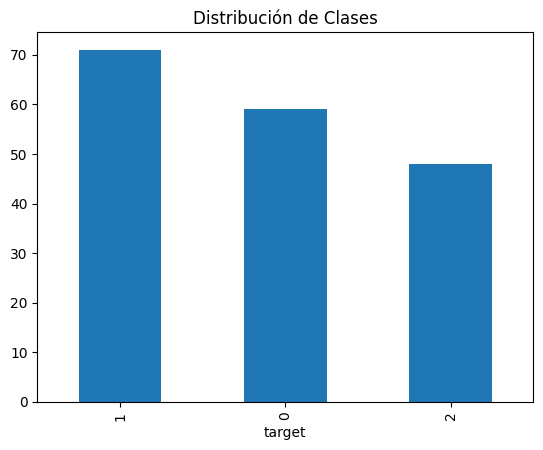

In [46]:
# ======================================================================================================================================
#
# DISTRIBUCIÓN DE LAS CLASES
#
y_vinos.value_counts().plot(kind='bar', title='Distribución de Clases') 

In [47]:
# ======================================================================================================================================
#
# VISUALIZACIÓN DE DATOS
#
df_vinos_to_plot = df_vinos.copy()
df_vinos_to_plot['target'] = df_vinos_to_plot['target'].map({i: name for i, name in enumerate(data_vinos.target_names)})
fig_vinos = px.scatter(
    df_vinos_to_plot,
    x='magnesium', 
    y='color_intensity', 
    color='target', 
    title='Distribución de Clases por Alcohol y Ácido Málico',
    labels={'target': 'Clase', 'magnesium': 'Magnesio', 'color_intensity': 'Intensidad de Color'}
)
fig_vinos.show()

In [48]:
# ======================================================================================================================================
#
# ENTRENAMIENTO DE UN ARBOL DE DECISIÓN SIN PODA
# 
# Separamos los datos: 80% para entrenamiento, 20% para prueba
X_train_vinos, X_test_vinos, y_train_vinos, y_test_vinos = train_test_split(X_vinos, y_vinos, test_size=0.2, random_state=42)
# Creamos el clasificador sin restricciones de profundidad
tree_overfit_vinos = DecisionTreeClassifier(random_state=42)
# Entrenamos el modelo
tree_overfit_vinos.fit(X_train_vinos, y_train_vinos)
# Evaluamos el rendimiento
y_train_pred_vinos = tree_overfit_vinos.predict(X_train_vinos)
y_test_pred_vinos = tree_overfit_vinos.predict(X_test_vinos)
train_accuracy_vinos = accuracy_score(y_train_vinos, y_train_pred_vinos)
test_accuracy_vinos = accuracy_score(y_test_vinos, y_test_pred_vinos)
# Mostramos las precisiones
display(Markdown(f"**Precisión en el set de ENTRENAMIENTO:** {train_accuracy_vinos:.4f} (Árbol Sobreajustado)"))
display(Markdown(f"**Precisión en el set de PRUEBA:** {test_accuracy_vinos:.4f}"))


**Precisión en el set de ENTRENAMIENTO:** 1.0000 (Árbol Sobreajustado)

**Precisión en el set de PRUEBA:** 0.9444

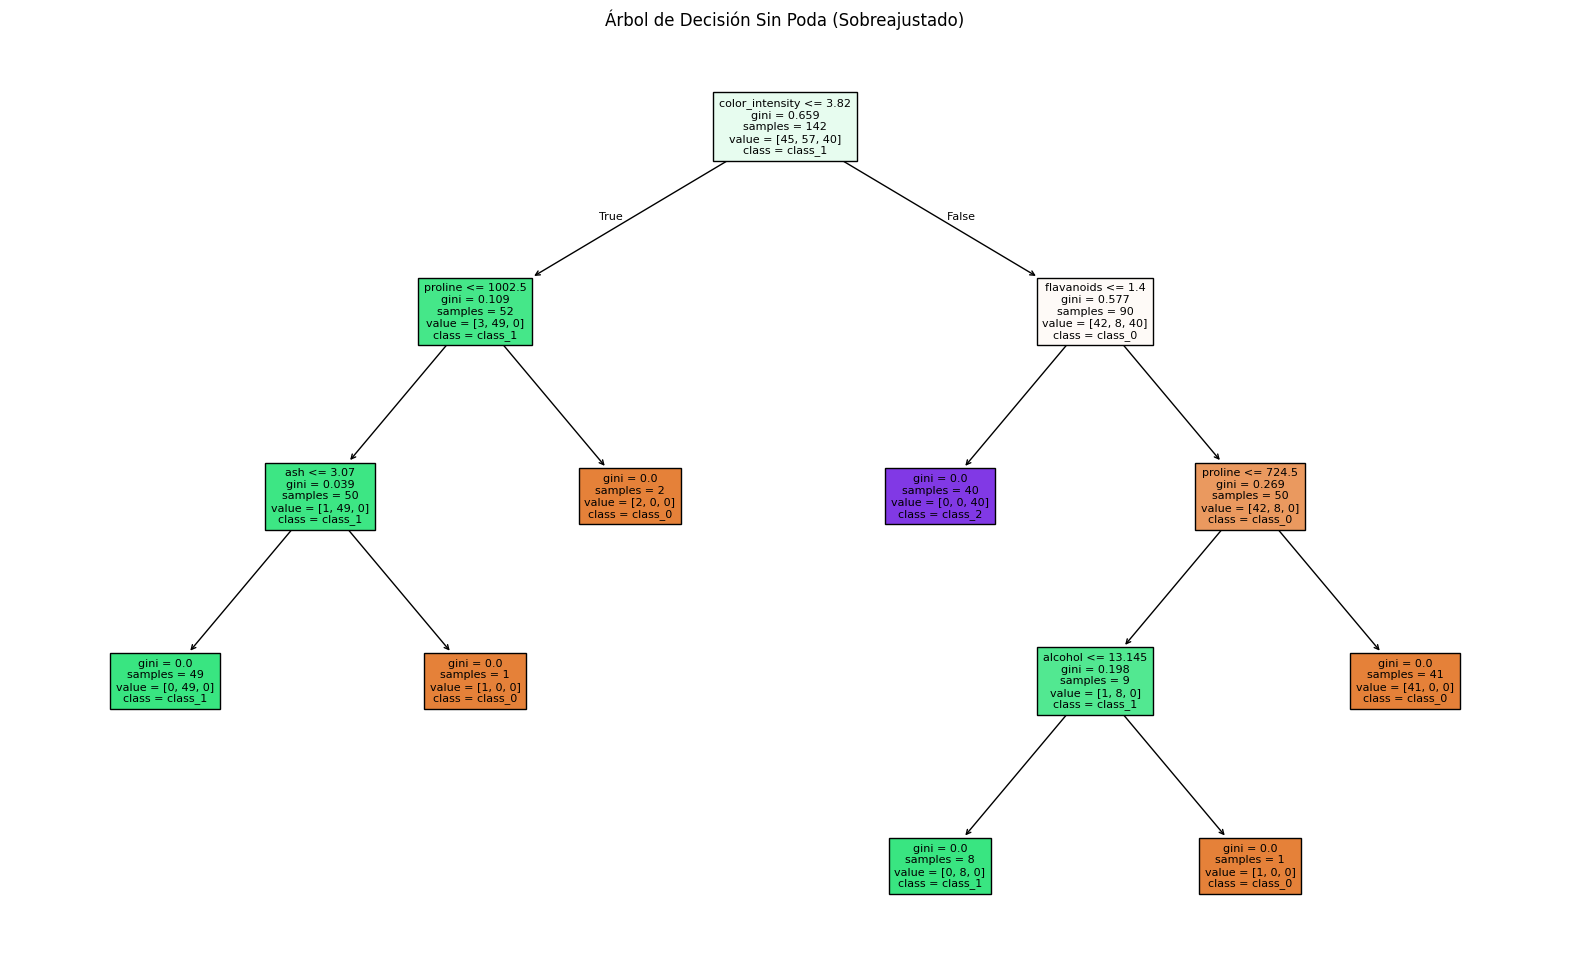

In [49]:
# ======================================================================================================================================
#
# VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN SIN PODA
#
# Mostramos el árbol
plt.figure(figsize=(20, 12))
plot_tree(tree_overfit_vinos,
            feature_names=data_vinos.feature_names, 
            class_names=data_vinos.target_names, 
            filled=True,
            fontsize=8)
plt.title("Árbol de Decisión Sin Poda (Sobreajustado)")
plt.show()

In [50]:
# ======================================================================================================================================
#
# PODA POR COMPLEJIDAD DE COSTO
#
# 1. Calcular la ruta de poda
path_vinos = tree_overfit_vinos.cost_complexity_pruning_path(X_train_vinos, y_train_vinos)
ccp_alphas_vinos = path_vinos.ccp_alphas
# 2. Excluimos el alpha máximo que eliminaría todo el árbol
ccp_alphas_vinos = ccp_alphas_vinos[:-1]
# 3. Encontrar el mejor alpha con Validación Cruzada
param_grid_vinos = {'ccp_alpha': ccp_alphas_vinos}
grid_search_vinos = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_vinos, cv=5, scoring='accuracy')
grid_search_vinos.fit(X_train_vinos, y_train_vinos)
best_alpha_vinos = grid_search_vinos.best_params_['ccp_alpha']
# Mostramos el mejor alpha encontrado
display(Markdown(f"**Mejor valor de ccp_alpha encontrado:** {best_alpha_vinos:.6f}"))


**Mejor valor de ccp_alpha encontrado:** 0.026013

In [51]:
# ======================================================================================================================================
#
# ENTRENAMIENTO Y EVALUACIÓN DEL ÁRBOL PODADO
#
# El GridSearchCV con refit=True (por defecto) ya ha re-entrenado el mejor modelo
tree_pruned_vinos = grid_search_vinos.best_estimator_
# Evaluamos el nuevo modelo podado
y_train_pred_p_vinos = tree_pruned_vinos.predict(X_train_vinos)
y_test_pred_p_vinos = tree_pruned_vinos.predict(X_test_vinos)
train_accuracy_p_vinos = accuracy_score(y_train_vinos, y_train_pred_p_vinos)
test_accuracy_p_vinos = accuracy_score(y_test_vinos, y_test_pred_p_vinos)
# Mostramos las precisiones del árbol podado
display(Markdown("--- Árbol Sobreajustado ---"))
display(Markdown(f"**Precisión en Entrenamiento:** {train_accuracy_vinos:.4f}"))
display(Markdown(f"**Precisión en Prueba:** {test_accuracy_vinos:.4f}"))
display(Markdown("\n--- Árbol Podado ---")) 
display(Markdown(f"**Precisión en Entrenamiento:** {train_accuracy_p_vinos:.4f}"))
display(Markdown(f"**Precisión en Prueba:** {test_accuracy_p_vinos:.4f}"))


--- Árbol Sobreajustado ---

**Precisión en Entrenamiento:** 1.0000

**Precisión en Prueba:** 0.9444


--- Árbol Podado ---

**Precisión en Entrenamiento:** 0.9718

**Precisión en Prueba:** 0.9444

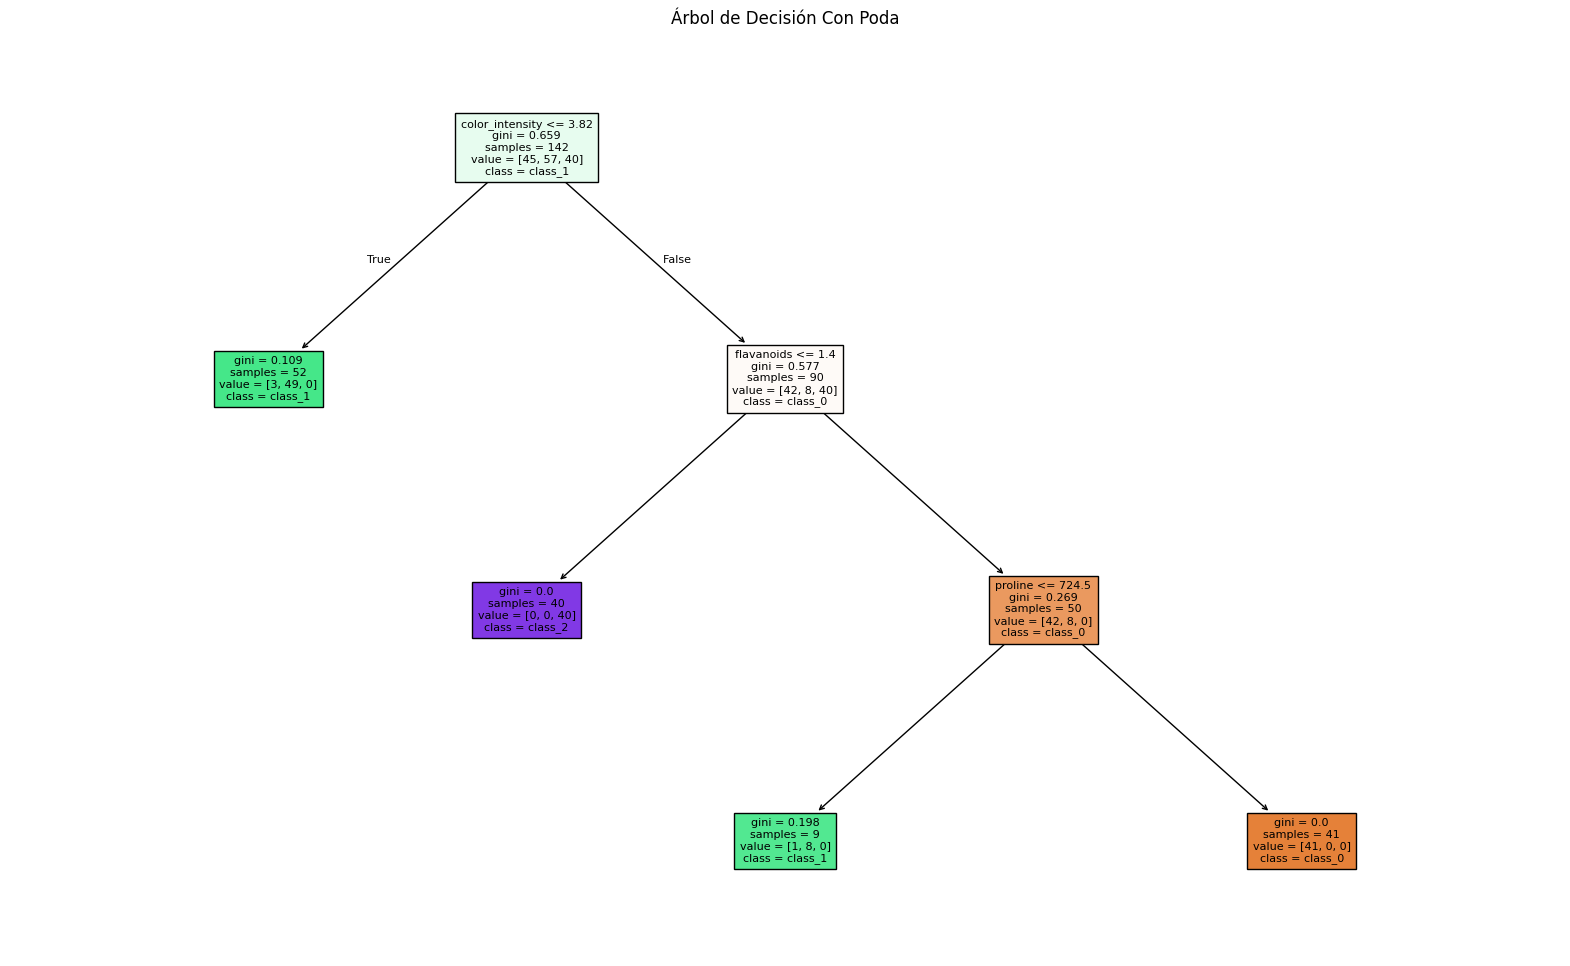

In [52]:
# ======================================================================================================================================
#
# VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN PODADO
#
# Mostramos el árbol
plt.figure(figsize=(20, 12))
plot_tree(tree_pruned_vinos,
            feature_names=data_vinos.feature_names, 
            class_names=data_vinos.target_names, 
            filled=True,
            fontsize=8)
plt.title("Árbol de Decisión Con Poda")
plt.show()

In [53]:
# ======================================================================================================================================
#
# CARACTERÍSTICAS MÁS IMPORTANTES
#
importances_vinos = pd.DataFrame({
    'feature': X_train_vinos.columns,
    'importance': tree_pruned_vinos.feature_importances_
}).sort_values('importance', ascending=False)
fig_vinos = px.bar(
    importances_vinos,
    x='feature',
    y='importance',
    title='Importancia de las Características en el Árbol Podado',
    labels={'feature': 'Característica', 'importance': 'Importancia (Reducción de Gini)'}
)
fig_vinos.show()

---------------------
#### 2.  **Árboles de Regresión:** Importa el dataset de **Viviendas de California** (`sklearn.datasets.fetch_california_housing`). Entrena un `DecisionTreeRegressor` para predecir el valor de las viviendas. El criterio de división por defecto es el error cuadrático medio (`'squared_error'`). ¿Cómo interpretas el árbol resultante?

`Respuesta`:

In [54]:
#
# PREPARACIÓN DEL ENTORNO
#
# >>> Librerías para manipulación y análisis de datos
import pandas as pd
# >>> Librerías para modelado y evaluación
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
# >>> Librerías para visualización
import plotly.express as px
from IPython.display import display, Markdown

# ======================================================================================================================================
#
# CARGA Y EXPLORACIÓN DE DATOS
#
data_california = fetch_california_housing(as_frame=True)
df_california = data_california.frame
# Separamos las características (X) y la variable objetivo (y)
X_california = df_california[data_california.feature_names]
y_california = df_california['MedHouseVal']
# Nombres de las clases
display(Markdown(f"**Nombres de las clases:** {data_california.target_names}"))
# Primeras filas del dataset
display(Markdown("**Primeras 5 filas de características:**"))
display(X_california.head())
# Resumen del dataset de California
display(Markdown("**Información del DataFrame de California:**"))
X_california.info()

**Nombres de las clases:** ['MedHouseVal']

**Primeras 5 filas de características:**

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**Información del DataFrame de California:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [55]:
# ======================================================================================================================================
#
# ENTRENAR UN DECISSION TREE REGRESSOR
#
# Separamos los datos: 80% para entrenamiento, 20% para prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)
# Creamos el regresor
tree_regressor = DecisionTreeRegressor(max_depth=6, random_state=42)
# Entrenamos el modelo
tree_regressor.fit(X_train_california, y_train_california)
# Evaluamos el rendimiento
y_train_pred_california = tree_regressor.predict(X_train_california)
y_test_pred_california = tree_regressor.predict(X_test_california)
train_mse_california = np.mean((y_train_california - y_train_pred_california) ** 2)
test_mse_california = np.mean((y_test_california - y_test_pred_california) ** 2)
# Mostramos los errores cuadráticos medios
display(Markdown(f"**Error Cuadrático Medio en el set de ENTRENAMIENTO:** {train_mse_california:.4f}"))
display(Markdown(f"**Error Cuadrático Medio en el set de PRUEBA:** {test_mse_california:.4f}"))

**Error Cuadrático Medio en el set de ENTRENAMIENTO:** 0.4301

**Error Cuadrático Medio en el set de PRUEBA:** 0.4973

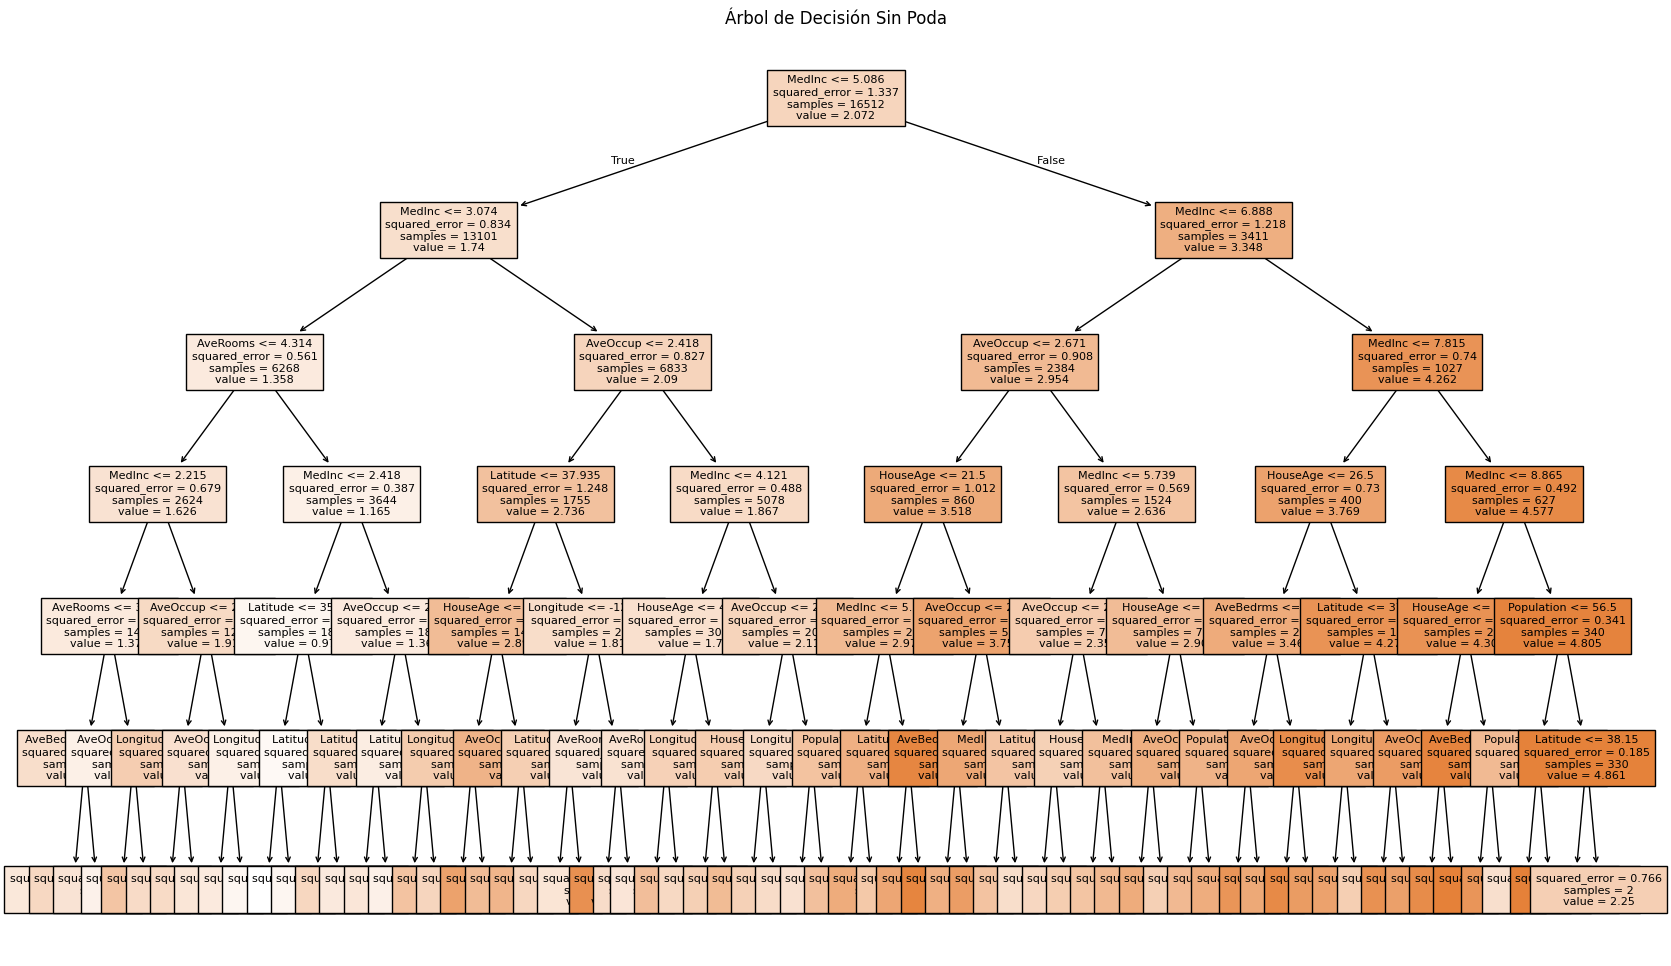

In [56]:
# ======================================================================================================================================
#
# VISUALIZACIÓN DEL ÁRBOL
#
# Mostramos el árbol
plt.figure(figsize=(20, 12))
plot_tree(tree_regressor, 
          feature_names=data_california.feature_names, 
          filled=True,
          fontsize=8)
plt.title("Árbol de Decisión Sin Poda")
plt.show()

**Interpretación**:
- Primero cree el regresor sin restricción de profundidad. Ocurrieron 2 cosas:
1) El error cuadrático medio del árbol sin poda, dio 0. Esto porque tomaba en cuenta el 100% del árbol (sobreajuste).
2) Demoró muchísimo el graficado del árbol.

- Luego regeneré el árbol con una profundidad de 6. Esta vez:
1) Esta vez el error cuadrático medio, sin poda, dio 0.4301. Esto porque ya no hay sobreajuste.
2) La construcción gráfica del árbol demoró mucho menos.
3) El ECM del set de pruebas (0.4973), es levemente mejor que el del set de entrenamiento (0.4301).

**Conclusiones**
- Si el árbol no tiene restricciones, existe sobreajuste. Su ECM es 0.
- Cuando se limita la profundidad del árbol, se elimina el sobreajuste y se mejora la generalización.

---------------------

#### 3.  **Análisis de Hiperparámetros:** Investiga el efecto de `min_samples_split` y `min_samples_leaf`. Usa `GridSearchCV` para encontrar la mejor combinación de `max_depth`, `min_samples_split` y `min_samples_leaf` para el dataset de cáncer. ¿Mejora el resultado de la poda por complejidad?

In [60]:
# Definimos los parametros
param_grid_cancer = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 7]
}

# Configuramos el GridSearchCV
grid_search_cancer = GridSearchCV(
    DecisionTreeClassifier(random_state=42), 
    param_grid_cancer, 
    cv=5, 
    scoring='accuracy'
) 

# Entrenamos el modelo 
grid_search_cancer.fit(X_train, y_train)

# Obtenemos los mejores parámetros
best_params_cancer = grid_search_cancer.best_params_
best_score_cancer = grid_search_cancer.best_score_
display(Markdown(f"**Mejores hiperparámetros encontrados:** {best_params_cancer}"))

# Reentrenamos el modelo con los mejores parámetros
best_tree_cancer = grid_search_cancer.best_estimator_

# Evaluamos el modelo con los mejores parámetros
y_train_pred_best = best_tree_cancer.predict(X_train)
y_test_pred_best = best_tree_cancer.predict(X_test)
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
display(Markdown("--- Árbol DF Cáncer, reentrenado con mejores parámetros ---"))
display(Markdown(f"**Precisión en el set de Entrenamiento con mejores parámetros:** {train_accuracy_best:.4f}"))
display(Markdown(f"**Precisión en el set de Prueba con mejores parámetros:** {test_accuracy_best:.4f}"))
display(Markdown("--- Árbol DF Cáncer, con poda por complejidad ---"))
display(Markdown(f"**Precisión en el set de Entrenamiento:** {train_accuracy_p:.4f}"))
display(Markdown(f"**Precisión en el set de Prueba:** {test_accuracy_p:.4f}"))


**Mejores hiperparámetros encontrados:** {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}

--- Árbol DF Cáncer, reentrenado con mejores parámetros ---

**Precisión en el set de Entrenamiento con mejores parámetros:** 0.9934

**Precisión en el set de Prueba con mejores parámetros:** 0.9386

--- Árbol DF Cáncer, con poda por complejidad ---

**Precisión en el set de Entrenamiento:** 0.9802

**Precisión en el set de Prueba:** 0.9561

**Conclusiones**
- Para el set de entrenamiento, utilizar los mejores hiperparámetros mejora levemente la precisión respecto de poda por compejidad: `0.9934` vs `0.9802`.
- Para el set de pruebas, en cambio, es con la poda por complejidad que se obtienen mejores resultados: `0.9561` vs `0.9386`


---------------------

#### 4.  **Visualización de Fronteras de Decisión:** Usando solo dos características (ej. `mean radius` y `mean texture`), entrena un árbol simple (ej. `max_depth=3`). Investiga cómo crear un gráfico de contorno (contour plot) para visualizar las "cajas" o fronteras de decisión que el árbol crea en el espacio 2D.

C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



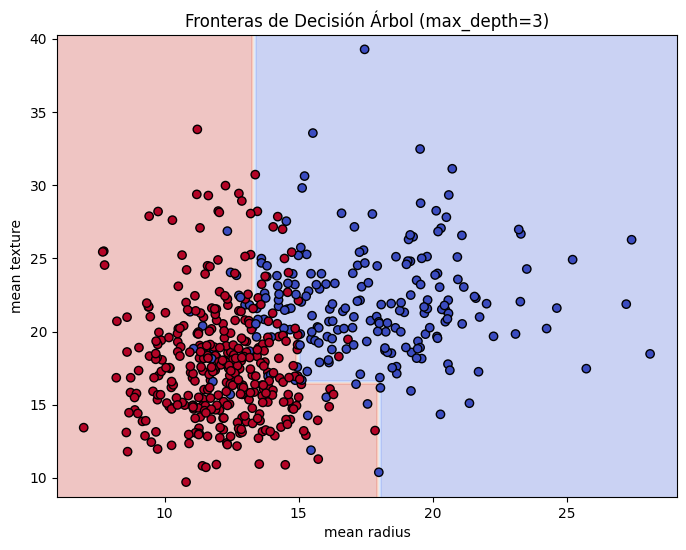

In [61]:
# Conservamos las 2 características solicitadas
X_features = X[['mean radius', 'mean texture']]

# Dividimos los datos: 80% para entrenamiento, 20% para prueba
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Entrenamos el modelo con las 2 características
tree_features = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_features.fit(X_train_features, y_train_features)

# Creamos las mallas para la visualización
x_min, x_max = X_features['mean radius'].min() - 1, X_features['mean radius'].max() + 1
y_min, y_max = X_features['mean texture'].min() - 1, X_features['mean texture'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
z = tree_features.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Graficamos las fronteras de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_features['mean radius'], X_features['mean texture'], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('Fronteras de Decisión Árbol (max_depth=3)')
plt.show()